In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Healthcare-Diabetes.csv')

# Display the first few rows of the dataset
df_head = df.head()

# Check the data types and missing values
data_info = df.info()

df_head, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


(   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0   1            6      148             72             35        0  33.6   
 1   2            1       85             66             29        0  26.6   
 2   3            8      183             64              0        0  23.3   
 3   4            1       89             66             23       94  28.1   
 4   5            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 None)

In [2]:
# Compute descriptive statistics for the dataset
desc_stats = df.describe()

desc_stats


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


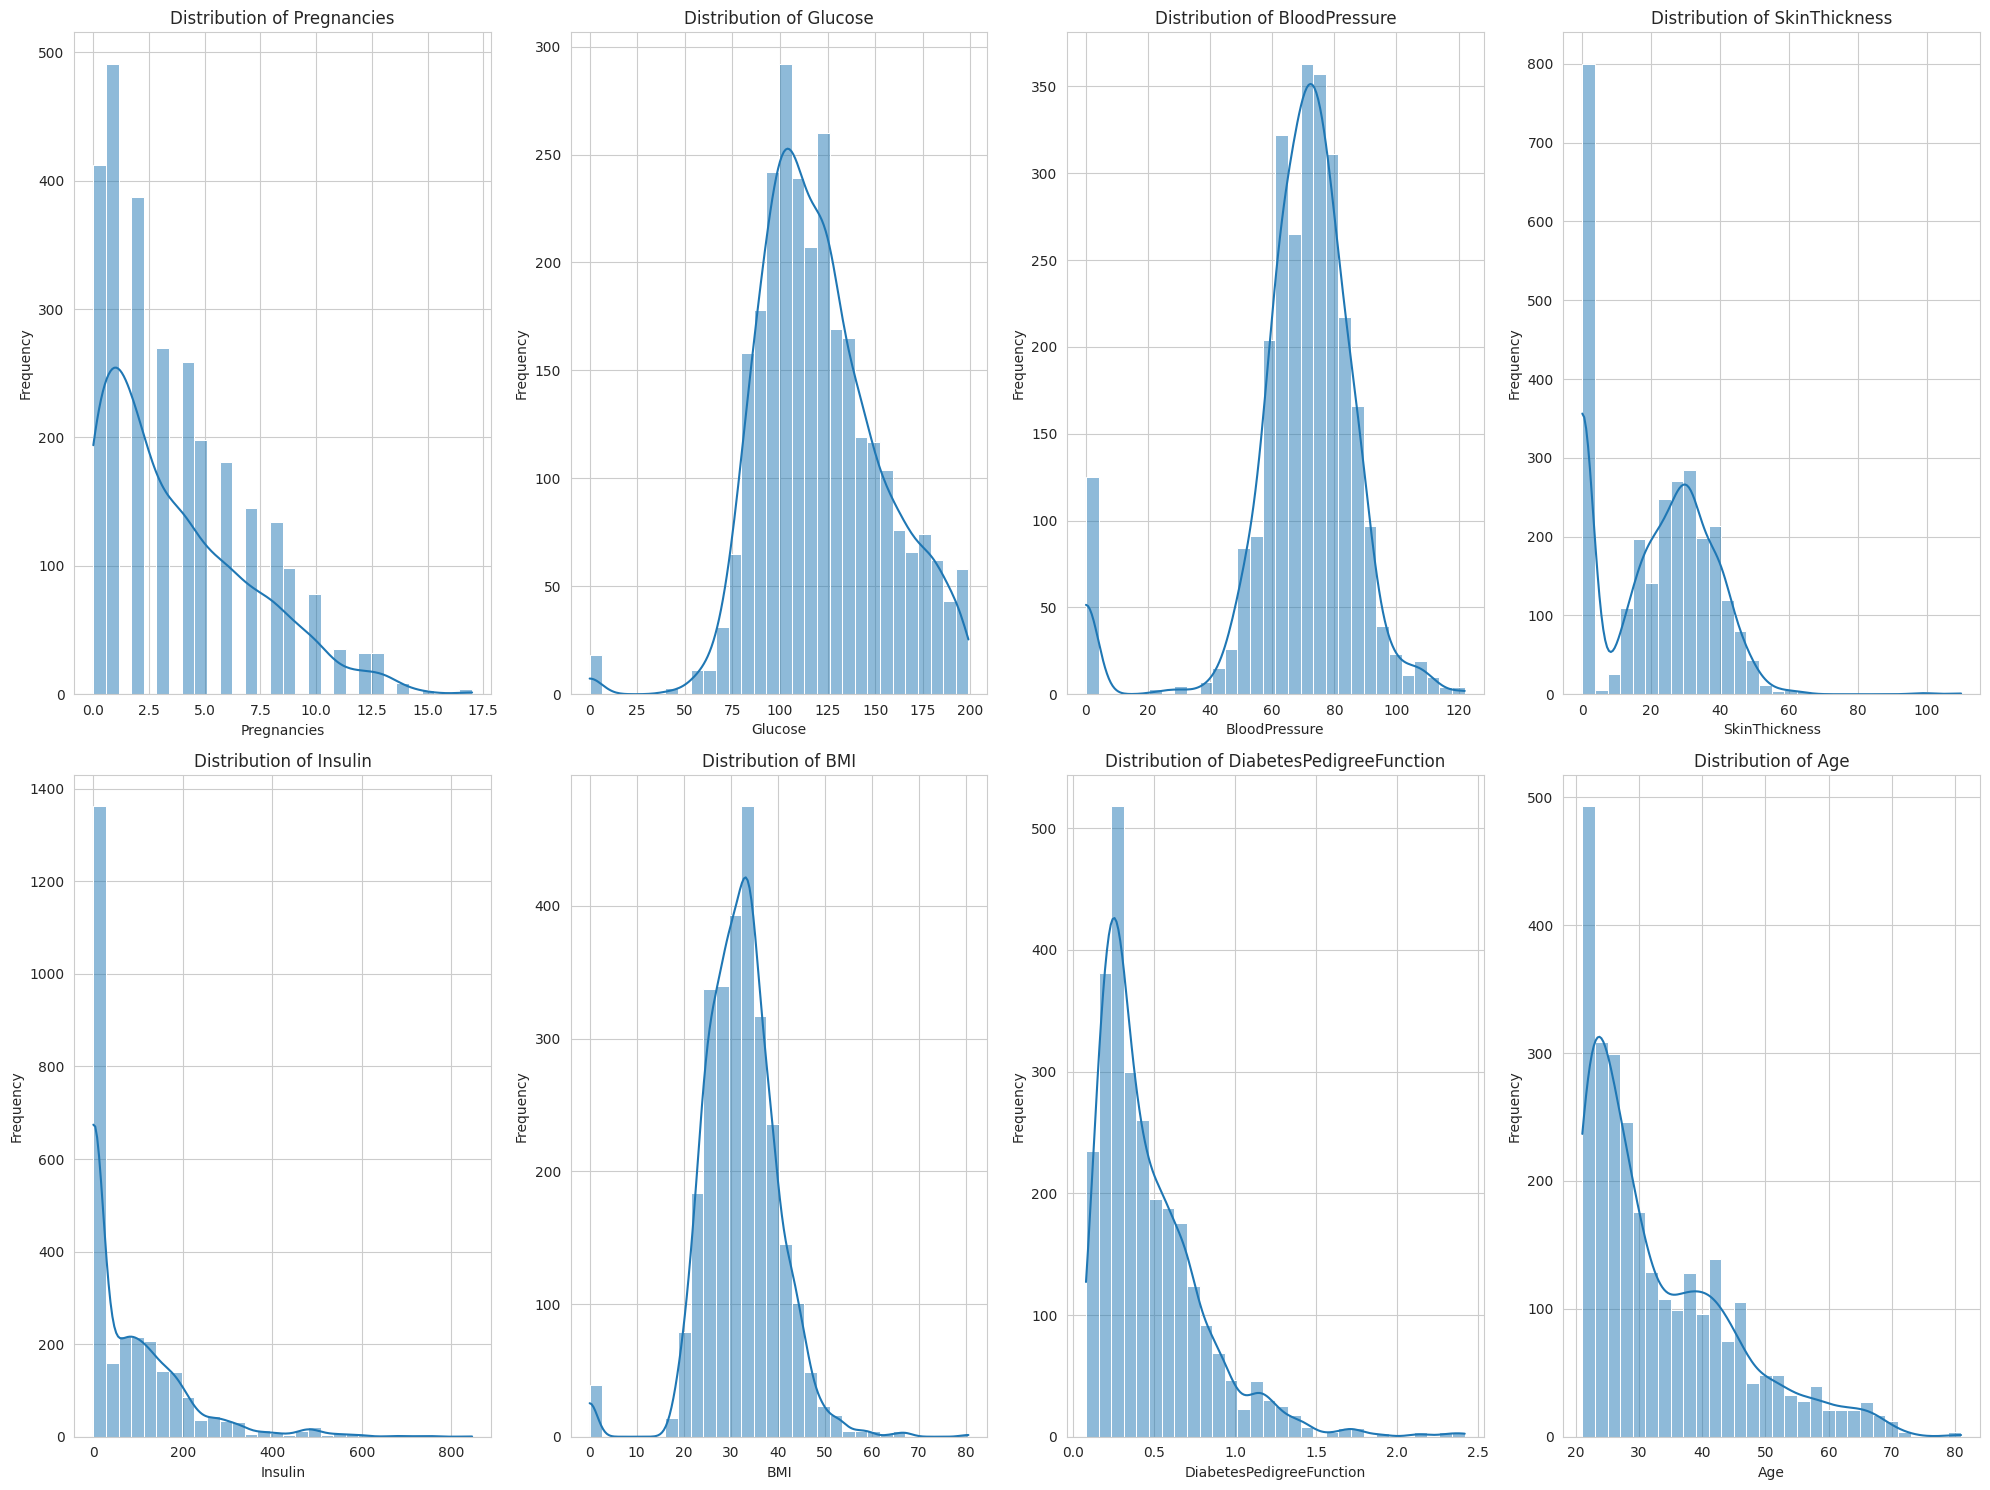

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# List of columns to visualize
cols_to_viz = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a subplot for each column
for i, col in enumerate(cols_to_viz, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()


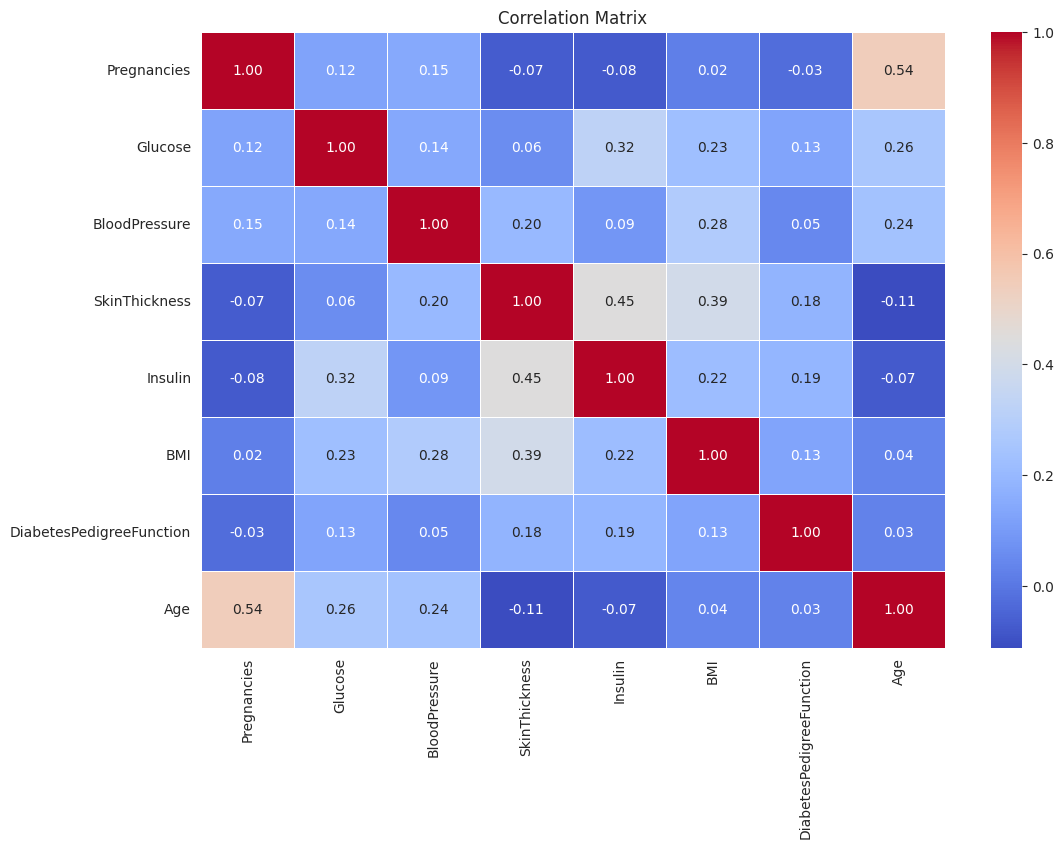

In [4]:
# Compute the correlation matrix
corr_matrix = df[cols_to_viz].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


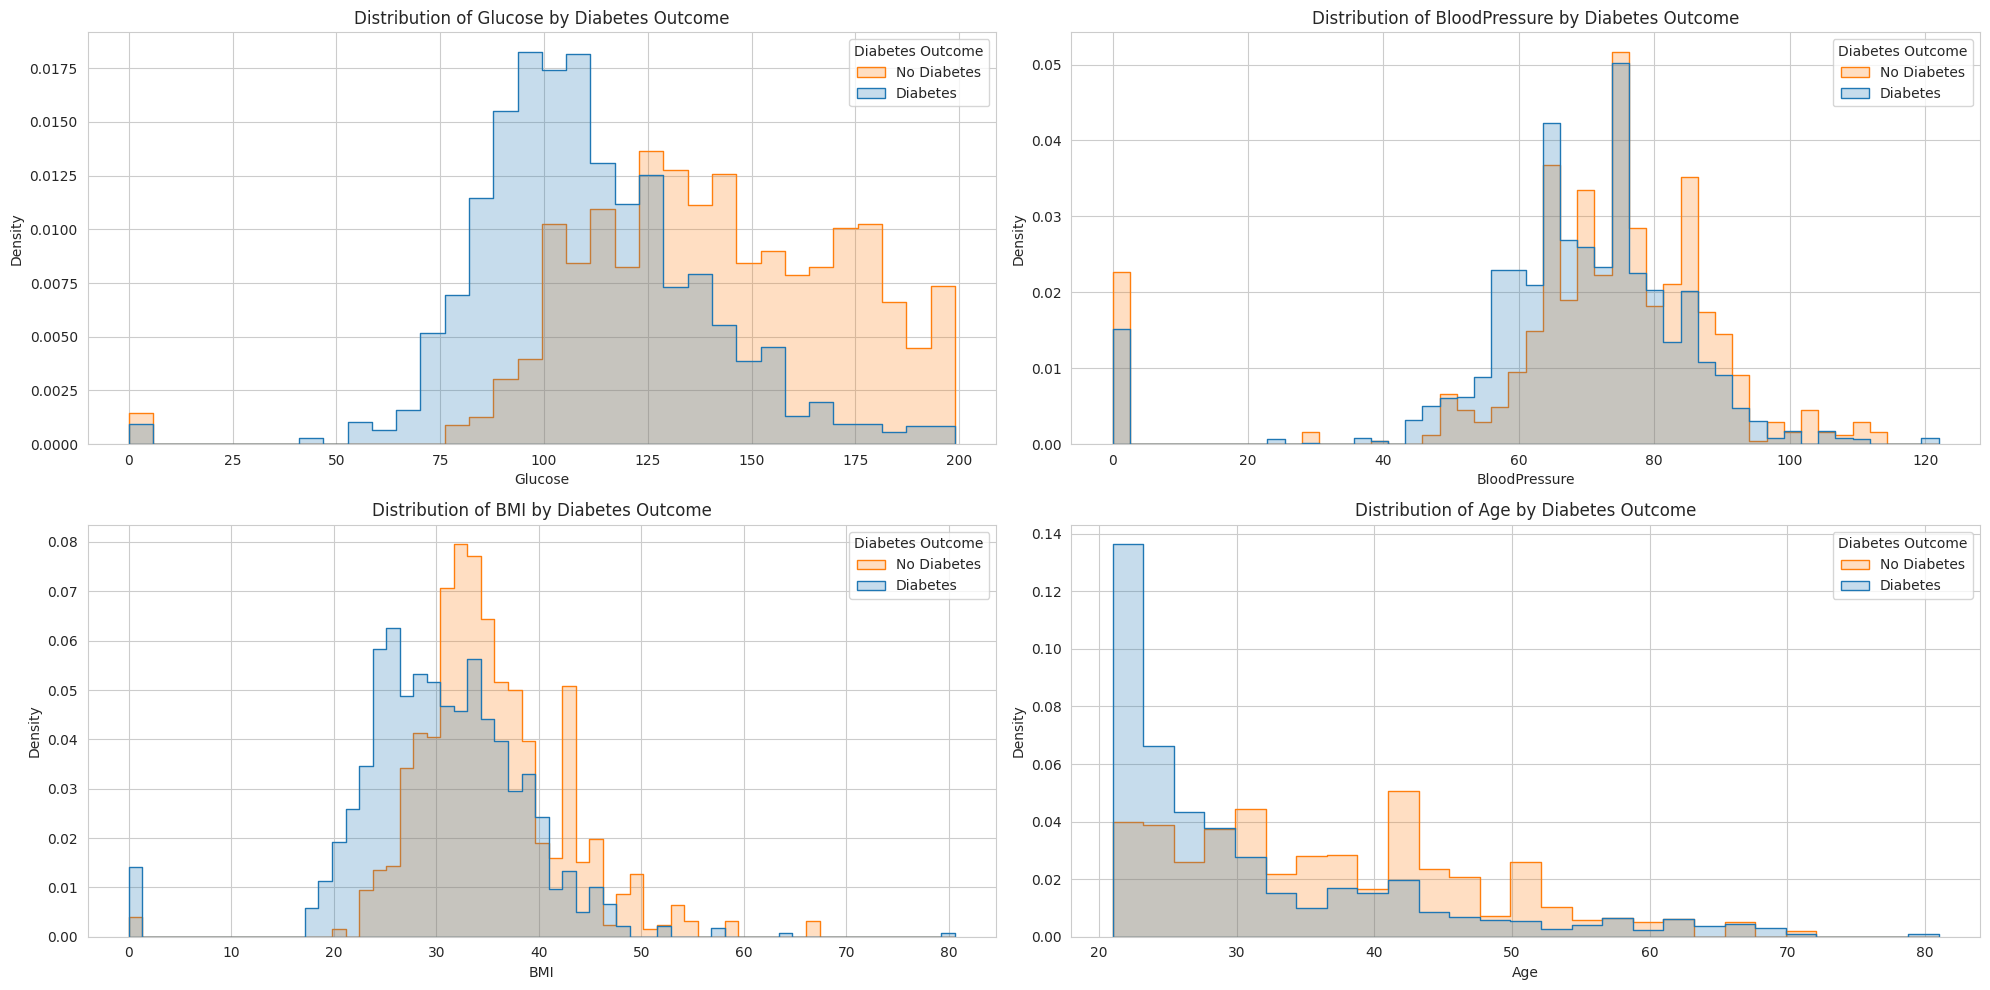

In [5]:
# Selecting some key features for comparison
cols_to_compare = ['Glucose', 'BloodPressure', 'BMI', 'Age']

# Initialize the figure
plt.figure(figsize=(20, 10))

# Create a subplot for each selected feature
for i, col in enumerate(cols_to_compare, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df, x=col, hue='Outcome', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {col} by Diabetes Outcome')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'])

# Adjust the layout
plt.tight_layout()
plt.show()


In [6]:
# Columns where zero values might be questionable
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count the number of zero values in each of these columns
zero_counts = df[cols_with_zeros].apply(lambda x: (x == 0).sum())

zero_counts


Glucose            18
BloodPressure     125
SkinThickness     800
Insulin          1330
BMI                39
dtype: int64

In [7]:
# Replace zero values with the median for each column in cols_with_zeros
for col in cols_with_zeros:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)

# Verify the replacement by rechecking the number of zero values
zero_counts_after_replacement = df[cols_with_zeros].apply(lambda x: (x == 0).sum())

zero_counts_after_replacement


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into training and testing sets
X = df.drop(['Id', 'Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy, class_report)


0.776173285198556               precision    recall  f1-score   support

           0       0.79      0.90      0.84       367
           1       0.73      0.53      0.62       187

    accuracy                           0.78       554
   macro avg       0.76      0.72      0.73       554
weighted avg       0.77      0.78      0.77       554

